<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_Bernstein%E2%80%93Vazirani__00_ChatGPT_mkbahk_20250414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c8c3bcc991ce9cdd86bce4eed7a47a03009eec904358c3c7d993ee1a4ca6b07f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.1 MB/s eta 0:00:00
  Cloning https://github.com/qisk

In [61]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# 숨겨진 비트 문자열 s (4비트)
s = '1110'
n = len(s)

# 회로 구성
qc = QuantumCircuit(n+1, n)

# 1. 마지막 큐비트에 X 및 H 적용 (출력 큐비트 초기화)
qc.x(n)
qc.h(n)
qc.barrier()

# 2. 입력 큐비트에도 H 적용
for i in range(n):
    qc.h(i)
###for
qc.barrier()

# 3. Oracle U_f 구현 (s_i = 1인 큐비트에 CNOT 연결)
for i, bit in enumerate(s):
    if bit == '1':
        qc.cx(i, n)
    ###if
###for
qc.barrier()

# 4. 입력 큐비트에 다시 H 적용
for i in range(n):
    qc.h(i)
###for
qc.barrier()

# 5. 측정
qc.measure(range(n), range(n))

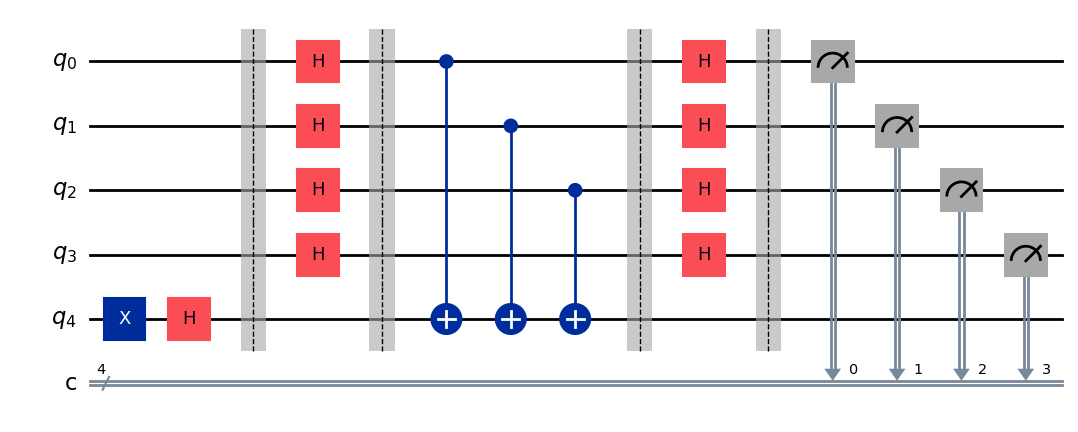

In [77]:
qc.draw('mpl')

In [78]:
# 시뮬레이션 실행
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, hots=1024).result()
counts = result.get_counts()

측정 결과: {'0111': 1024}


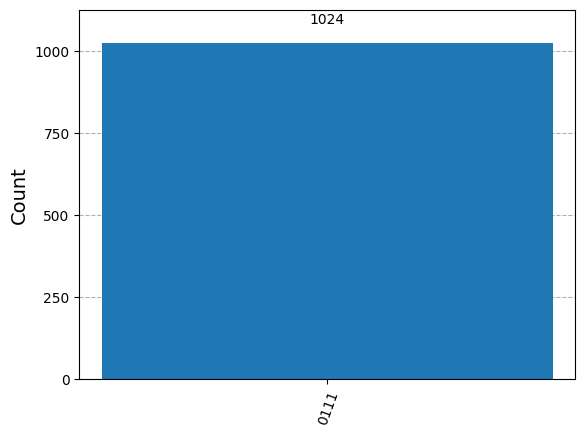

In [79]:
# 결과 출력
print("측정 결과:", counts)
plot_histogram(counts)